In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math
from matplotlib.lines import Line2D

In [3]:
# Define parameters
eps, theta, theta, eta, lam = sp.symbols('eps theta theta eta lam', real=True)

Derive H(X|Y) as a fucntion of error rate

In [4]:
# Calculate the constant H(X|Y) given etailon
h_XY = -eps * sp.log(eps, 2) - (1 - eps) * sp.log(1 - eps, 2)

h_XY

-eps*log(eps)/log(2) - (1 - eps)*log(1 - eps)/log(2)

Derive H(X|Z) as a funciton of Theta and Theta: H(X|Z) = S(rho_ae) - S(rho_e) - h(eps)

In [5]:
# Define density matrices of Eve obtained from partical tracing the joing state of Bob and Eve after Cloning Machine

rho_0 = (1/2) * sp.Matrix([
    [1 + sp.sin(eta)**2, sp.cos(eta)],
    [sp.cos(eta), sp.cos(eta)**2]
])
rho_1 = (1/2) * sp.Matrix([
    [1 + sp.sin(eta)**2, sp.exp(-sp.I * theta) * sp.cos(eta)],
    [sp.exp(sp.I * theta) * sp.cos(eta), sp.cos(eta)**2]
])
rho_2 = (1/2) * sp.Matrix([
    [1 + sp.sin(eta)**2, sp.exp(-sp.I * theta) * sp.cos(eta)],
    [sp.exp(sp.I * theta) * sp.cos(eta), sp.cos(eta)**2]
])

# Compute eigenvalues for each density matrix
ev0 = list(rho_0.eigenvals().keys())
ev1 = list(rho_1.eigenvals().keys())
ev2 = list(rho_2.eigenvals().keys())

# Verify sum of eigenvalues is 1
for i, ev in enumerate(ev0):
    print(f"Eigenvalue {i + 1} simplified : {ev} ")
sum_eigenval0 = sum(ev0)
for i, ev in enumerate(ev1):
    print(f"Eigenvalue {i + 1} simplified : {ev} ")
sum_eigenval1 = sum(ev1)
for i, ev in enumerate(ev2):
    print(f"Eigenvalue {i + 1} simplified : {ev} ")
sum_eigenval2 = sum(ev2)
print(f"Sum of the eigenvalues: {sum_eigenval2}")

Eigenvalue 1 simplified : 0.5 - 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) 
Eigenvalue 2 simplified : 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) + 0.5 
Eigenvalue 1 simplified : 0.5 - 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) 
Eigenvalue 2 simplified : 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) + 0.5 
Eigenvalue 1 simplified : 0.5 - 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) 
Eigenvalue 2 simplified : 0.467707173346743*sqrt(0.142857142857143*cos(4*eta) + 1.0) + 0.5 
Sum of the eigenvalues: 1.00000000000000


In [6]:
# Define density matrix of Eve where rho_e = 1/3 (rho_0 + rho_1 + rho_2)
rho_e = (1/6) * sp.Matrix([
    [3 + 3 * sp.sin(eta)**2, (1 + (sp.cos(theta) - sp.I * sp.sin(theta)) + (sp.cos(theta) - sp.I * sp.sin(theta))) * sp.cos(eta)],
    [(1 + (sp.cos(theta) + sp.I * sp.sin(theta)) + (sp.cos(theta) + sp.I * sp.sin(theta))) * sp.cos(eta), 3 * sp.cos(eta)**2] 
])

# Compute eigenvalues of Eve's density matrices
eigenval_ = list(rho_e.eigenvals().keys())
eigenval = [ev.simplify() for ev in eigenval_]

# Verify sum of eigenvalues is 1
for i, ev in enumerate(eigenval):
    print(f"Eigenvalue {i + 1} simplified : {ev} ")
sum_eigenval = sum(eigenval_)
print(f"Sum of the eigenvalues: {sum_eigenval}")

Eigenvalue 1 simplified : 0.5 - sqrt((-1.0*sin(eta)**2 + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 0.666666666666667)*cos(eta)**2 + 1.0)/2 
Eigenvalue 2 simplified : sqrt((-1.0*sin(eta)**2 + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 0.666666666666667)*cos(eta)**2 + 1.0)/2 + 0.5 
Sum of the eigenvalues: 1.00000000000000


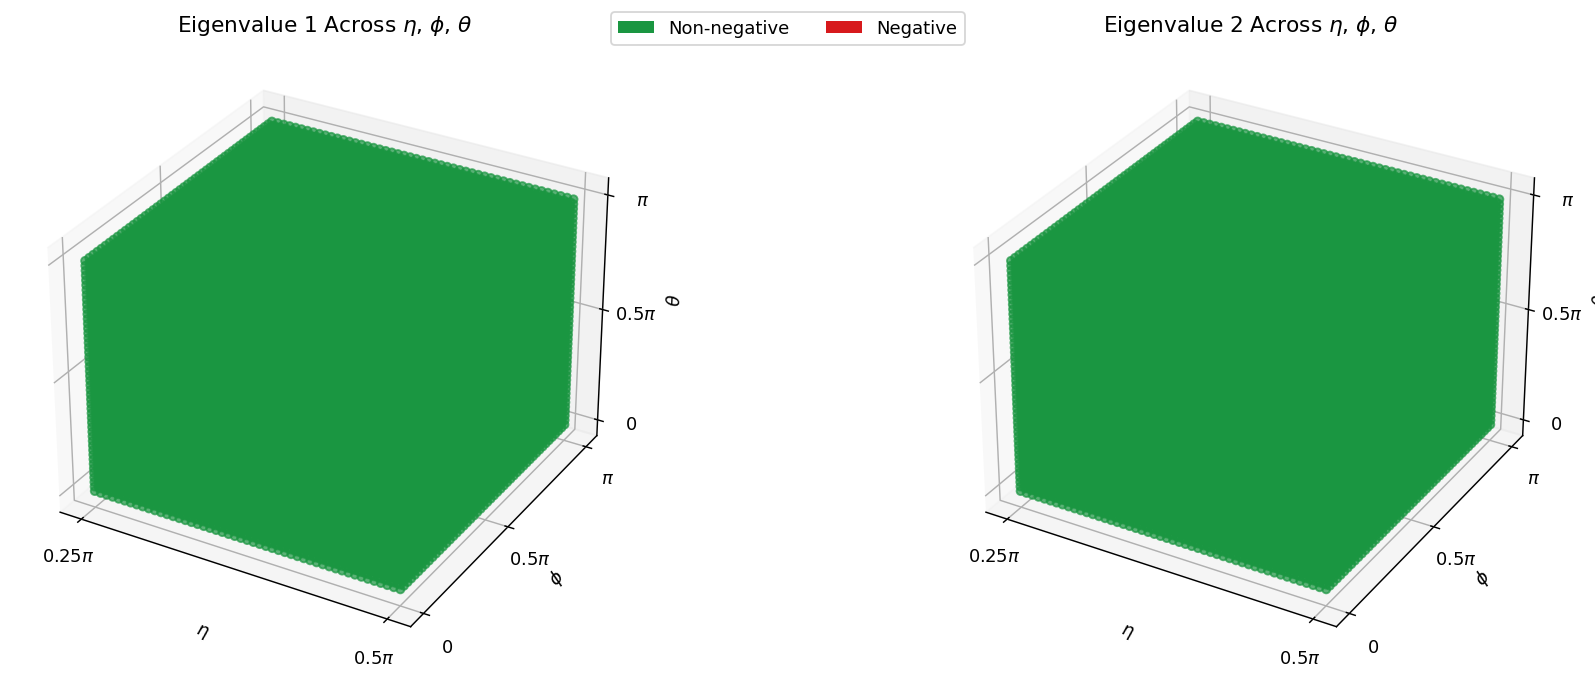

In [7]:
#Check eigenvalues non-negativity

# Set ranges for eta and theta and set binary arrays indicating non-negativity
eta_vals = np.linspace(np.pi/4, np.pi/2, 50)
theta_vals = np.linspace(0, np.pi, 50)
theta_vals = np.linspace(0, np.pi, 50)
ei1 = sp.lambdify((eta, theta, theta), eigenval[0], 'numpy') # Select from {ev0, ev1, ev2, eigenval} and check for non-negativity
ei2 = sp.lambdify((eta, theta, theta), eigenval[1], 'numpy') # Similarly, select from {ev0, ev1, ev2, eigenval}
eta_mesh, theta_mesh, theta_mesh = np.meshgrid(eta_vals, theta_vals, theta_vals)
eigenval1_vals = ei1(eta_mesh, theta_mesh, theta_mesh)
eigenval2_vals = ei2(eta_mesh, theta_mesh, theta_mesh)
eigenval1_binary = np.where(eigenval1_vals >= 0, 1, 0)
eigenval2_binary = np.where(eigenval2_vals >= 0, 1, 0)

legend_elements = [
    Patch(facecolor='#1a9641', label='Non-negative'),
    Patch(facecolor='#d7191c', label='Negative')
]

def plot_eigenvalue(ax, binary_vals, title):
    # Scatter plot with theta on the z-axis
    scatter = ax.scatter(
        eta_mesh.flatten(),
        theta_mesh.flatten(),
        theta_mesh.flatten(),
        c=np.where(binary_vals.flatten() == 1, '#1a9641', '#d7191c'),
        alpha=0.7,
        marker='o'
    )
    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel(r'$\theta$')
    ax.set_zlabel(r'$\theta$')
    ax.set_xticks([np.pi/4, np.pi/2])
    ax.set_xticklabels([r'$0.25\pi$', r'$0.5\pi$'])
    ax.set_yticks([0, np.pi/2, np.pi])
    ax.set_yticklabels([r'$0$', r'$0.5\pi$', r'$\pi$'])
    ax.set_zticks([0, np.pi/2, np.pi])
    ax.set_zticklabels([r'$0$', r'$0.5\pi$', r'$\pi$'])
    ax.set_title(title)
    return scatter

fig = plt.figure(figsize=(14, 6), dpi=130)
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = plot_eigenvalue(ax1, eigenval1_binary, r'Eigenvalue 1 Across $\eta$, $\theta$, $\theta$')
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = plot_eigenvalue(ax2, eigenval2_binary, r'Eigenvalue 2 Across $\eta$, $\theta$, $\theta$')
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3)
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, 0.95))

plt.show()

In [8]:
# Compute the Von Neumann Entropy for rho_ae and rho_e
s_0 = -sum(ev * sp.log(ev, 2) for ev in ev0)
s_1 = -sum(ev * sp.log(ev, 2) for ev in ev1)
s_2 = -sum(ev * sp.log(ev, 2) for ev in ev2)
S_ae = (1/3) * (s_0 + s_1 + s_2) + np.log2(3)
S_e = -sum(ev * sp.log(ev, 2) for ev in eigenval)

In [9]:
# 3. Compute H(X|Z) and normalise by log2(3)
_h_XZ = (S_ae - S_e) / np.log2(3)
s_h_XZ = sp.simplify(_h_XZ)

# Asuuming Bob's measurement error all come from cloning machine, Fidelity_b = 1 - eps
sub_h_XZ = s_h_XZ.subs({eta: sp.asin(1 - 2 * eps)})
h_XZ = sp.simplify(sub_h_XZ)

h_XZ

(-0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) - 1.0)*log(0.5 - sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2) + 0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) + 1.0)*log(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2 + 0.5) + 0.630929753571458*(2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 0.625*eps**2 - 0.125*eps + 0.03125) - 0.5)*log(0.5 - 2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 0.625*eps**2 - 0.125*eps + 0.03125)) - 0.630929753571458*(2.8284

Plot H(X|Z) graph

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in log
  return (-0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) - 1.0)*log(0.5 - 1/2*sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)) + 0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) + 1.0)*log((1/2)*sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) + 0.5) + 0.630929753571458*(2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 0.625*eps**2 - 0.125*eps + 0.03125) - 0.5)*log(0.5 - 2.82842712474619*s

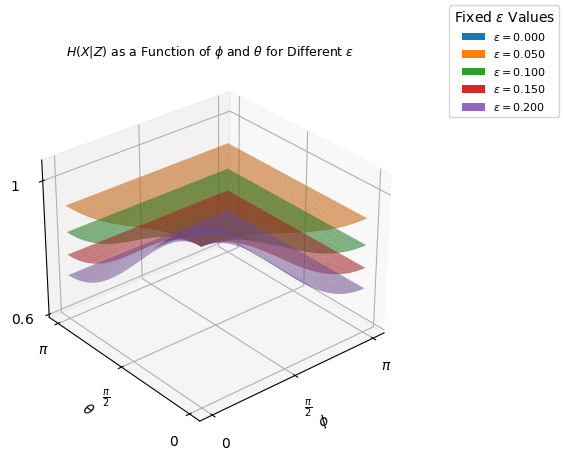

In [10]:
# Plot H(X|Z) against Theta and Theta

h_XZ_func = sp.lambdify((eps, theta, theta), h_XZ, 'numpy')

# Set up ranges for epsilon and theta
eps_vals = np.linspace(0, 0.2, 5)
theta_vals = np.linspace(0, np.pi, 100)
theta_vals = np.linspace(0, np.pi, 100)
theta_mesh, theta_mesh = np.meshgrid(theta_vals, theta_vals)

fig = plt.figure(figsize=(7, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot H(X|Z) for different epsilon values
for eps_val, color in zip(eps_vals, colors):
    h_XZ_vals = h_XZ_func(eps_val, theta_mesh, theta_mesh) + i * 0.05
    ax.plot_surface(
        theta_mesh, theta_mesh, h_XZ_vals, 
        alpha=0.6, 
        color=color, 
        edgecolor='none',
        linewidth=0.5,
        label=f"$\\epsilon = {eps_val:.3f}$"
    )

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\theta$')
ax.set_zlabel(r'$H(X|Z)$')
ax.set_title(r'$H(X|Z)$ as a Function of $\theta$ and $\theta$ for Different $\epsilon$', fontsize=9)
ax.set_xticks([0, np.pi / 2, np.pi])
ax.set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax.set_yticks([0, np.pi / 2, np.pi])
ax.set_yticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax.set_zticks([0.6, 1])
ax.set_zticklabels([r'$0.6$', r'$1$'])
ax.view_init(elev=30, azim=230)

legend_elements = [Patch(facecolor=color, label=f"$\\epsilon = {eps_val:.3f}$") for eps_val, color in zip(eps_vals, colors)]
fig.legend(
    handles=legend_elements, 
    loc='upper right', 
    fontsize=8,
    ncol=1, 
    title="Fixed $\epsilon$ Values"
)

plt.subplots_adjust(left=0.15, right=0.85)
plt.show()

Derive R as a fucntion of theta and error rate

In [11]:
# Find the proportion of usable rounds from key disrtribution phase (form raw key)
f_distibute = (2/9) * (3 - sp.cos(theta) - sp.cos(theta) - sp.cos(theta - theta))

f_distibute

-0.222222222222222*cos(phi) - 0.222222222222222*cos(theta) - 0.222222222222222*cos(phi - theta) + 0.666666666666667

In [12]:
# Find the proportion of which the raw key can be shrinked (normalised by log2(3))
_f_rawkey = h_XZ - h_XY
f_rawkey = sp.simplify(_f_rawkey)

f_rawkey

(eps*log(eps) - (eps - 1)*log(1 - eps) - 0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) - 1.0)*log(0.5 - sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2) + 0.315464876785729*(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) + 1.0)*log(sqrt((1 - (2*eps - 1)**2)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2 + 0.5) + 0.630929753571458*(2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 0.625*eps**2 - 0.125*eps + 0.03125) - 0.5)*log(0.5 - 2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 0.625*eps**2 - 0.125*eps 

In [13]:
# Key generating rate R = proportion of raw key formed from distributed bits x proportion of raw key retained
_R = f_distibute * f_rawkey
R = sp.simplify(_R)

R

-(0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 0.666666666666667)*(eps*log(eps) - (eps - 1)*log(1 - eps) - 0.315464876785729*(sqrt(-((2*eps - 1)**2 - 1)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) - 1.0)*log(0.5 - sqrt(-((2*eps - 1)**2 - 1)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2) + 0.315464876785729*(sqrt(-((2*eps - 1)**2 - 1)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0) + 1.0)*log(sqrt(-((2*eps - 1)**2 - 1)*(-4.0*eps**2 + 4.0*eps + 0.222222222222222*cos(phi) + 0.222222222222222*cos(theta) + 0.222222222222222*cos(phi - theta) - 1.66666666666667) + 1.0)/2 + 0.5) + 0.630929753571458*(2.82842712474619*sqrt(0.5*eps**4 - eps**3 + 

Plot R graphs

C:\Temp\ipykernel_18188\2063634473.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


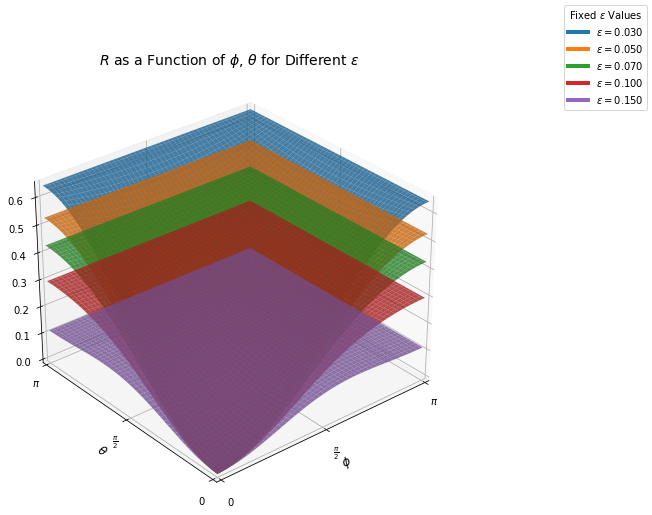

In [14]:
# Plot R against Theta and Theta for different values of Eps

R_func = sp.lambdify((theta, theta, eps), R, 'numpy')

# Set up ranges for theta, theta, and epsilon
theta_vals = np.linspace(0, np.pi, 100)
theta_vals = np.linspace(0, np.pi, 100)
eps_vals = [0.03, 0.05, 0.07, 0.1, 0.15]
theta_mesh, theta_mesh = np.meshgrid(theta_vals, theta_vals)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for eps_val, color in zip(eps_vals, colors):
    R_vals = R_func(theta_mesh, theta_mesh, eps_val)
    ax.plot_surface(theta_mesh, theta_mesh, R_vals, alpha=0.8, color=color)

ax.set_xlim(0, np.pi)
ax.set_ylim(0, np.pi)
ax.set_xticks([0, np.pi / 2, np.pi])
ax.set_xticklabels([r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
ax.set_yticks([0, np.pi / 2, np.pi])
ax.set_yticklabels([r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
ax.view_init(elev=30, azim=230)

ax.set_xlabel(r'$\theta$', fontsize=12)
ax.set_ylabel(r'$\theta$', fontsize=12)
ax.set_zlabel(r'$R$', fontsize=12)
ax.set_title(r'$R$ as a Function of $\theta$, $\theta$ for Different $\epsilon$', fontsize=14)

legend_elements = [
    Line2D([0], [0], color=color, lw=4, label=f"$\\epsilon = {eps_val:.3f}$")
    for eps_val, color in zip(eps_vals, colors)
]
fig.legend(handles=legend_elements, title="Fixed $\epsilon$ Values", loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


Solve for optimal Theta that maximises R

In [37]:
# Find optimal Theta

R_func = sp.lambdify((eps, theta, theta), R, 'numpy')
dR_dtheta = sp.diff(R, theta)
dR_dtheta = sp.diff(R, theta)
dR_dtheta_func = sp.lambdify((eps, theta, theta), dR_dtheta, 'numpy')
dR_dtheta_func = sp.lambdify((eps, theta, theta), dR_dtheta, 'numpy')

def find_optimal_theta_theta(eps_val, max_iter=100, learning_rate=0.1, tol=1e-6):
    np.random.seed(42)
    theta_cur = np.random.uniform(0, np.pi)
    theta_cur = np.random.uniform(0, np.pi)

    for i in range(max_iter):
        grad_theta = dR_dtheta_func(eps_val, theta_cur, theta_cur)
        grad_theta = dR_dtheta_func(eps_val, theta_cur, theta_cur)

        theta_next = theta_cur + learning_rate * grad_theta
        theta_next = theta_cur + learning_rate * grad_theta

        theta_next = np.clip(theta_next, 0, np.pi)
        theta_next = np.clip(theta_next, 0, np.pi)

        # Check for convergence
        if abs(theta_next - theta_cur) < tol and abs(theta_next - theta_cur) < tol:
            break

        # Update theta and theta for the next iteration
        theta_cur, theta_cur = theta_next, theta_next

    return theta_cur, theta_cur

eps_val = 0.05
optimal_theta, optimal_theta = find_optimal_theta_theta(eps_val)
R_value = R_func(eps_val, optimal_theta, optimal_theta)

print(f"Optimal theta for epsilon = {eps_val}: {optimal_theta}")
print(f"Optimal theta for epsilon = {eps_val}: {optimal_theta}")
print(f"Corresponding R = {R_value}")

Optimal phi for epsilon = 0.05: 1.1725815259684371
Optimal theta for epsilon = 0.05: 3.141592653589793
Corresponding R = 0.528374988454932


Find critical error rate (R drops to negative)

In [16]:
# Find critical error rate
def find_critical_eps_binary(eps_start=0.15, eps_end=0.3, tol=1e-6):
    eps_low = eps_start
    eps_high = eps_end

    while eps_high - eps_low > tol:
        eps_mid = (eps_low + eps_high) / 2

        cur_theta = find_optimal_theta_theta(eps_mid)[0]
        cur_theta = find_optimal_theta_theta(eps_mid)[1]
        R_value = R_func(eps_mid, cur_theta, cur_theta)

        if R_value < 0:
            eps_high = eps_mid
        else:
            eps_low = eps_mid

    critical_eps = (eps_low + eps_high) / 2
    final_theta = find_optimal_theta_theta(critical_eps)[0]
    final_theta = find_optimal_theta_theta(critical_eps)[1]
    final_R = R_func(critical_eps, final_theta, final_theta)

    return critical_eps, final_R

eps_critical, R_critical = find_critical_eps_binary(eps_start=0.15, eps_end=0.3)

print(f"critical epsilon = {eps_critical}")
print(f"R = {R_critical}")

critical epsilon = 0.22941255569458008
R = 1.302509340626962e-07


Analysis and Plots

In [17]:
# Find max R when error rate is small

min_eps = 0 + 1e-6 # 0.000001
max_theta = find_optimal_theta_theta(min_eps)[0]
max_theta = find_optimal_theta_theta(min_eps)[1]
max_R = R.subs({eps: min_eps, theta: max_theta, theta: max_theta})
max_R_value = max_R.evalf()

print(f"Max R: {max_R_value}")

Max R: 0.888860206173246


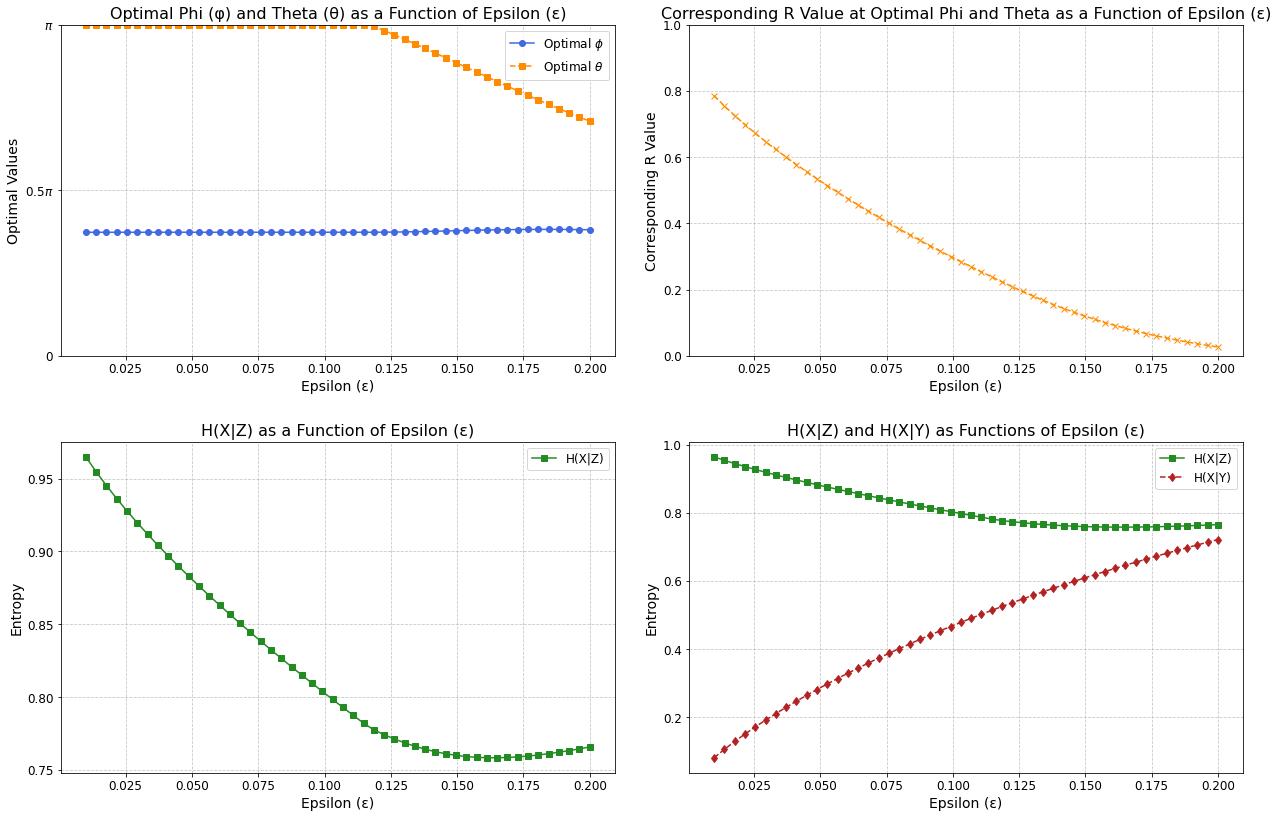

In [18]:
# Plot for analysis

eps_values = np.linspace(0.01, 0.2, 50)
optimal_theta_values = []
optimal_theta_values = []
optimal_R_values = []
h_XZ_values = []
h_XY_values = []

for eps_val in eps_values:
    opt_theta = find_optimal_theta_theta(eps_val)[0]
    opt_theta = find_optimal_theta_theta(eps_val)[1]
    optimal_theta_values.append(opt_theta)
    optimal_theta_values.append(opt_theta)
    optimal_R_values.append(R_func(eps_val, opt_theta, opt_theta))
    h_XZ_values.append(h_XZ_func(eps_val,opt_theta, opt_theta))
    h_XY_values.append(-eps_val * np.log2(eps_val + 1e-10) - (1 - eps_val) * np.log2(1 - eps_val + 1e-10))

plt.figure(figsize=(18, 12))

# Plot for Optimal Theta and Theta
plt.subplot(2, 2, 1)
plt.plot(eps_values, optimal_theta_values, marker='o', linestyle='-', color='royalblue', markersize=6, linewidth=1.5, label=r'Optimal $\theta$')
plt.plot(eps_values, optimal_theta_values, marker='s', linestyle='--', color='darkorange', markersize=6, linewidth=1.5, label=r'Optimal $\theta$')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Optimal Values', fontsize=14)
plt.title('Optimal Theta (φ) and Theta (θ) as a Function of Epsilon (ε)', fontsize=16)
plt.ylim(0, np.pi)
plt.yticks([0, np.pi / 2, np.pi], [r'$0$', r'$0.5{\pi}$', r'$\pi$'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Plot for Corresponding R Values
plt.subplot(2, 2, 2)
plt.plot(eps_values, optimal_R_values, marker='x', linestyle='--', color='darkorange', markersize=6, linewidth=1.5)
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Corresponding R Value', fontsize=14)
plt.title('Corresponding R Value at Optimal Theta and Theta as a Function of Epsilon (ε)', fontsize=16)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for H(X|Z)
plt.subplot(2, 2, 3)
plt.plot(eps_values, h_XZ_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) as a Function of Epsilon (ε)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Plot for H(X|Y) and H(X|Z)
plt.subplot(2, 2, 4)
plt.plot(eps_values, h_XZ_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.plot(eps_values, h_XY_values, marker='d', linestyle='--', color='firebrick', markersize=6, linewidth=1.5, label='H(X|Y)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) and H(X|Y) as Functions of Epsilon (ε)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Plot
plt.tight_layout(pad=3.0)
plt.show()

Find upper bound of Eve's infomation gain I(X;Z)

In [31]:
# Find critical point of H(X|Z)

d_hxz_deps = sp.diff(h_XZ, eps)
d_hxz_dtheta = sp.diff(h_XZ, theta)
d_hxz_dtheta = sp.diff(h_XZ, theta)

h_xz_func = sp.lambdify((eps, theta, theta), h_XZ, 'numpy')
d_hxz_deps_func = sp.lambdify((eps, theta, theta), d_hxz_deps, 'numpy')
d_hxz_dtheta_func = sp.lambdify((eps, theta, theta), d_hxz_dtheta, 'numpy')
d_hxz_dtheta_func = sp.lambdify((eps, theta, theta), d_hxz_dtheta, 'numpy')

def H_XZ_gradient_descent(eps_start=0.155, learning_rate=0.0001, max_iter=1000, tol=1e-8, decay=0.99):
    eps_cur = eps_start
    prev_eps = None
    lr = learning_rate

    for i in range(max_iter):
        optimal_theta, optimal_theta = find_optimal_theta_theta(eps_cur)
        gradient = d_hxz_deps_func(eps_cur, optimal_theta, optimal_theta)

        eps_next = eps_cur - lr * gradient
        eps_next = np.clip(eps_next, 0.15, 0.175)

        if prev_eps is not None and abs(eps_next - prev_eps) < tol:
            break

        prev_eps = eps_cur
        eps_cur = eps_next
        lr *= decay

    final_theta, final_theta = find_optimal_theta_theta(eps_cur)
    H_XZ_value = h_XZ.subs({eps: eps_cur, theta: final_theta, theta: final_theta})

    return eps_cur, H_XZ_value

eps_critical, hxz_critical = H_XZ_gradient_descent()
hxz_critical_value = hxz_critical.evalf()

print(f"Critical epsilon: {eps_critical}")
print(f"H(X|Z) at critical point: {hxz_critical_value}")


Critical epsilon: 0.1660875372486062
H(X|Z) at critical point: 0.758411670640185


In [32]:
# Find upper bound on Eve's knowledge I(X;Z) = H(X) - H(X|Z)
i_hz = 1 - hxz_critical_value

print(f"Upper bound of Eve's knowledge: {i_hz}")

Upper bound of Eve's knowledge: 0.241588329359815


Analyse Eve's Cloning Strategy

In [38]:
# Compare H(X|Z) and h(Fe)

# Define fidelity of Eve and the binary entropy h(Fe)
Fe = 0.5 * (1 + sp.cos(sp.asin(1 - 2 * eps)))
h_Fe = -Fe * sp.log(Fe, 2) - (1 - Fe) * sp.log(1 - Fe, 2)

# Substitute eps and corresponding optimal theta value
sh_xz = h_XZ.subs({eps: eps_val, theta: optimal_theta, theta: optimal_theta})
sh_Fe = h_Fe.subs({eps: eps_val})
sh_xz_value = sh_xz.evalf()
sh_Fe_value = sh_Fe.evalf()

print(f"H(X|Z): {sh_xz_value}")
print(f"h(Fe): {sh_Fe_value}")

H(X|Z): 0.880818819127756
h(Fe): 0.858235875301516


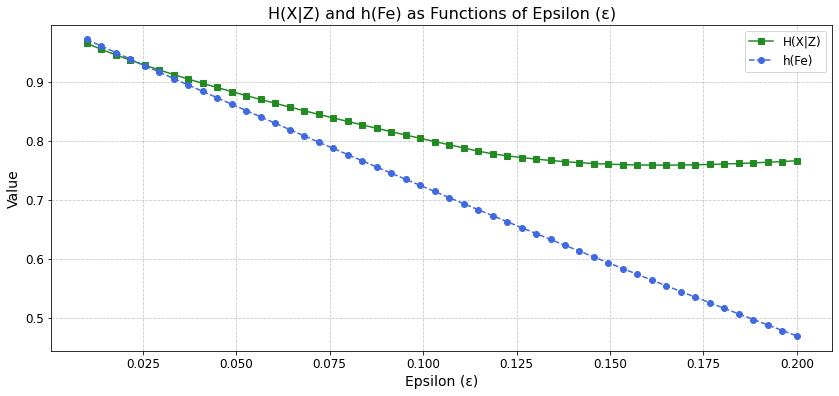

In [39]:
Fe_func = sp.lambdify(eps, Fe, 'numpy')
h_Fe_func = sp.lambdify(eps, h_Fe, 'numpy')

eps_values = np.linspace(0.01, 0.2, 50)
optimal_theta_values = []
optimal_R_values = []
h_values = []
Fe_values = []
h_Fe_values = []

for eps_val in eps_values:
    opt_theta = find_optimal_theta_theta(eps_val)[0]
    opt_theta = find_optimal_theta_theta(eps_val)[1]
    optimal_theta_values.append(opt_theta)
    optimal_theta_values.append(opt_theta)
    optimal_R_values.append(R_func(eps_val, opt_theta, opt_theta))
    h_values.append(h_XZ_func(eps_val,opt_theta, opt_theta))
    Fe_values.append(Fe_func(eps_val))
    h_Fe_values.append(h_Fe_func(eps_val))

# Plot for H(X|Z)
plt.figure(figsize=(14, 6)) 
plt.plot(eps_values, h_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.plot(eps_values, h_Fe_values, marker='o', linestyle='--', color='royalblue', markersize=6, linewidth=1.5, label='h(Fe)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('H(X|Z) and h(Fe) as Functions of Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()